# Introduction to the Gillespie Algorithm

## Key Concepts

The Gillespie algorithm simulates the exact time course of a stochastic process without resorting to the approximations required by deterministic methods or the fixed time step limitations of other stochastic simulation techniques. It is particularly useful for systems where the number of entities (such as molecules in a chemical reaction) is small enough that random fluctuations have a significant impact on the system's dynamics.

### Stochastic Processes

In stochastic processes, the next state of the system is not determined solely by its current state but involves a degree of randomness. This contrasts with deterministic processes, where the future state of the system can be predicted exactly from its current state using differential equations.

### Reaction Propensity

The Gillespie algorithm relies on the concept of "propensity," which measures the likelihood of a reaction occurring in a small time interval. For chemical reactions, this is a function of the reaction rate constant and the concentration of the reactants.

### Algorithm Steps

The Gillespie algorithm follows a simple yet powerful sequence of steps to simulate the time evolution of a stochastic system:

1. **Initialization**: Define the initial state of the system, including the numbers of each type of reactant and the total simulation time.

2. **Rate Calculation**: Calculate the propensity of each reaction given the current state of the system.

3. **Time to Next Reaction**: Randomly determine the time to the next reaction using the propensity values, typically through an exponential distribution.

4. **Reaction Selection**: Randomly select which reaction will occur next, weighted by the propensity of each reaction.

5. **State Update**: Update the state of the system to reflect the occurrence of the selected reaction.

6. **Iteration**: Repeat steps 2-5 until the simulation reaches the specified end time or another stopping criterion.


# Mathematical Foundation of the Gillespie Algorithm for Population Growth

The Gillespie algorithm provides a rigorous framework for simulating the stochastic dynamics of population growth. This section dives into the mathematics underpinning the Gillespie algorithm, specifically tailored to model the population growth of a species in a stochastic context.

## Stochastic Processes in Population Dynamics

Population growth can be influenced by stochastic events such as births, deaths, and migration. The Gillespie algorithm models these events as stochastic processes, where the probability of an event occurring within a small time interval is determined by propensity functions.

### Propensity Function in Population Dynamics

For population growth, the propensity function quantifies the likelihood of a birth or death event occurring in a given time interval. If we consider a simple model where the population grows through birth events and decreases through death events, the propensity for each type of event can be defined as follows:

- **Birth Propensity**: Given a birth rate constant $\lambda$, the propensity for a birth event when there are $N$ individuals in the population is $\lambda \cdot N$.
- **Death Propensity**: Similarly, with a death rate constant $\mu$, the propensity for a death event is $\mu \cdot N$.

### Time to Next Event

The time until the next event (either birth or death) occurs is determined by the total propensity of all events, $a_0 = \lambda \cdot N + \mu \cdot N$. The time $\Delta t$ to the next event is sampled from an exponential distribution with parameter $a_0$:

$$ P(\Delta t) = a_0 \exp(-a_0 \Delta t) $$

### Event Selection

With the probabilities of birth and death events defined as $P(\text{birth}) = \frac{\lambda \cdot N}{a_0}$ and $P(\text{death}) = \frac{\mu \cdot N}{a_0}$ respectively, the Gillespie algorithm selects which event occurs next based on these probabilities.

## Algorithm Steps for Population Growth

To simulate population growth, the Gillespie algorithm follows these steps:

1. **Initialization**: Define the initial population size $N$ and set the initial time.
2. **Calculate Propensities**: Compute the birth and death propensities based on the current population size.
3. **Determine $\Delta t$**: Sample the time to the next event from an exponential distribution with mean $1/a_0$.
4. **Select Event**: Choose a birth or death event to occur next, based on their relative probabilities.
5. **Update Population**: Increment or decrement the population size according to the selected event.
6. **Advance Time**: Update the system time by $\Delta t$ and repeat from step 2 until reaching a specified end condition.

This mathematical approach allows the Gillespie algorithm to accurately simulate the inherently stochastic nature of population growth, capturing the random fluctuations that can significantly impact small populations or those subject to variable environmental conditions.


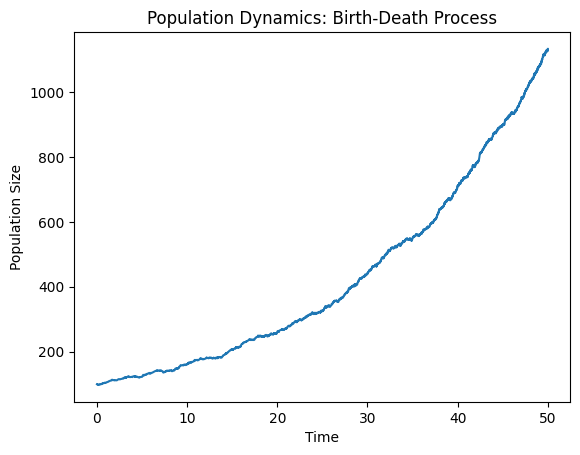

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
birth_rate = 0.1
death_rate = 0.05
initial_population = 100
max_time = 50

# Initialization
population = initial_population
time = 0
times = [time]
populations = [population]

# Gillespie Simulation
while time < max_time:
    if population == 0:
        break  # Extinction

    # Calculate propensities
    birth_propensity = birth_rate * population
    death_propensity = death_rate * population
    total_propensity = birth_propensity + death_propensity

    # Determine time to next event
    time_to_next = np.random.exponential(1 / total_propensity)
    time += time_to_next

    # Determine which event occurs (birth or death)
    if np.random.random() < birth_propensity / total_propensity:
        population += 1  # Birth occurs
    else:
        population -= 1  # Death occurs

    # Record the results
    times.append(time)
    populations.append(population)

# Plotting the results
plt.plot(times, populations)
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Population Dynamics: Birth-Death Process')
plt.show()
